In [1]:
import numpy as np
import pandas as pd
import PySAM.Pvsamv1 as pv

import matplotlib.pyplot as plt

In [2]:
pvmodel = pv.default('PVBatteryResidential')

In [3]:
# there are formatting differences between the weather file that we download from
# pvwatts and what SAM wants --- SAM wants the file from the NSRDB 
pvmodel.SolarResource.solar_resource_file = "../data/tmy_5.579_-0.233_2005_2014.epw"

In [4]:
pvmodel.Inverter.export()

{'inv_cec_cg_eff_cec': 96.6364,
 'inv_cec_cg_paco': 3800.0,
 'inv_ds_eff': 96.0,
 'inv_ds_paco': 4000.0,
 'inv_num_mppt': 1.0,
 'inv_pd_eff': 95.0,
 'inv_pd_paco': 4000.0,
 'inv_snl_eff_cec': 97.0531,
 'inv_snl_paco': 3850.0,
 'inverter_count': 1.0,
 'inverter_model': 0.0,
 'mppt_hi_inverter': 480.0,
 'mppt_low_inverter': 100.0}

In [5]:
our_load_profile = np.loadtxt("../data/Max_load_profile_for_year.txt", skiprows=1)

In [6]:
pvmodel.Load.load = tuple(our_load_profile)

In [7]:
pvmodel.execute()

<BarContainer object of 12 artists>

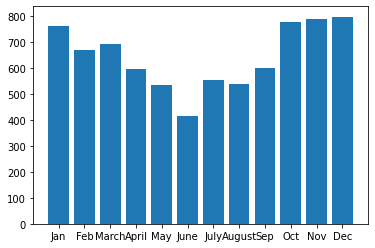

In [8]:
months = ["Jan", "Feb", "March", "April", "May", "June", "July", "August", "Sep", "Oct", "Nov", "Dec"]
plt.bar(months, pvmodel.Outputs.monthly_energy)

In [26]:
pvmodel.Outputs.annual_energy

7727.689373191183

In [ ]:
pvmodel.Outputs.monthly_energy # System AC energy
pvmodel.Load.load  # electricity load

In [29]:
pvmodel.Outputs.monthly_pv_to_batt
pvmodel.Outputs.monthly_pv_to_load
pvmodel.Outputs.monthly_pv_to_grid

(750.711656171897,
 662.9025297515311,
 689.0340199777896,
 594.0414600117102,
 534.4611413648552,
 415.3544522925302,
 554.3418794810761,
 537.2526129661588,
 594.1591143248256,
 760.971941522531,
 777.7707962925422,
 789.9051667848086)

In [24]:
dates = pd.date_range(start="1/1/2006", end="1/1/2007", freq="H").delete(-1)

In [26]:
hourly_load_w_dates = pd.DataFrame({"Load" : pvmodel.Load.load, "Dates" : dates})

In [40]:
hourly_load_w_dates.groupby(hourly_load_w_dates["Dates"].dt.month)["Load"].sum()

Dates
1     3867.684
2     3493.392
3     3867.684
4     3742.920
5     3867.684
6     3742.920
7     3867.684
8     3867.684
9     3742.920
10    3867.684
11    3742.920
12    3867.684
Name: Load, dtype: float64

In [52]:
hourly_load_w_dates.groupby(hourly_load_w_dates["Dates"].dt.strftime('%B'))["Load"].sum()

Dates
April        120.739355
August       124.764000
December     124.764000
February     112.690065
January      124.764000
July         124.764000
June         120.739355
March        124.764000
May          124.764000
November     120.739355
October      124.764000
September    120.739355
Name: Load, dtype: float64